In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-customer/test-set.csv
/kaggle/input/automobile-customer/train-set.csv


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df=pd.read_csv('/kaggle/input/automobile-customer/train-set.csv')
test_df=pd.read_csv('/kaggle/input/automobile-customer/test-set.csv')

In [4]:
train_df.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [5]:
train_df.shape

(8068, 11)

In [6]:
test_df.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Category 6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Category 6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Category 6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Category 6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Category 6


In [7]:
test_df.shape

(2627, 10)

In [8]:
train_df = train_df.drop(columns=['Category', 'Segmentation'])
test_df = test_df.drop(columns=['Category'])
df = pd.concat([train_df, test_df])

In [9]:
df.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [10]:
df.shape

(10695, 9)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,10695.0,463468.088640,2600.966411,458982.0,461220.5,463451.0,465733.5,467974.0
Age,10695.0,43.511828,16.774158,18.0,30.0,41.0,53.0,89.0
WorkExperience,9597.0,2.619777,3.390790,0.0,0.0,1.0,4.0,14.0
FamilySize,10247.0,2.844052,1.536427,1.0,2.0,3.0,4.0,9.0


In [12]:
df.isnull().sum()

CustomerID           0
Gender               0
Married            190
Age                  0
Graduated          102
Profession         162
WorkExperience    1098
SpendingScore        0
FamilySize         448
dtype: int64

In [13]:
df1=df.drop(columns=['WorkExperience'])

In [14]:
df1.shape

(10695, 8)

In [15]:
df1['FamilySize'].value_counts()

FamilySize
2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: count, dtype: int64

In [16]:
per_na=df1.isnull().sum()/len(df1)
per_na

CustomerID       0.000000
Gender           0.000000
Married          0.017765
Age              0.000000
Graduated        0.009537
Profession       0.015147
SpendingScore    0.000000
FamilySize       0.041889
dtype: float64

In [17]:
df2=df1.dropna(subset=['Married','Graduated', 'Profession'])

In [18]:
df2.isnull().sum()

CustomerID         0
Gender             0
Married            0
Age                0
Graduated          0
Profession         0
SpendingScore      0
FamilySize       416
dtype: int64

In [19]:
most_frequent_family_size = df2['FamilySize'].mode()[0]

# Fill missing values with the most frequent value
df2['FamilySize'].fillna(most_frequent_family_size, inplace=True)

/tmp/ipykernel_18/443570994.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['FamilySize'].fillna(most_frequent_family_size, inplace=True)
/tmp/ipykernel_18/443570994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FamilySize'].fillna(most_frequent_family_size, inplace=True)


In [20]:
df2.isnull().sum()

CustomerID       0
Gender           0
Married          0
Age              0
Graduated        0
Profession       0
SpendingScore    0
FamilySize       0
dtype: int64

In [21]:
to_drop = ["CustomerID"]
df2 = df2.drop(to_drop, axis=1)


In [22]:
df2.head()

,Gender,Married,Age,Graduated,Profession,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,Low,4.0
1,Female,Yes,38,Yes,Engineer,Average,3.0
2,Female,Yes,67,Yes,Engineer,Low,1.0
3,Male,Yes,67,Yes,Lawyer,High,2.0
4,Female,Yes,40,Yes,Entertainment,High,6.0


In [23]:
df2['Profession'].value_counts()

Profession
Artist           3259
Healthcare       1691
Entertainment    1217
Doctor            910
Engineer          907
Lawyer            817
Executive         754
Marketing         388
Homemaker         317
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Gender')

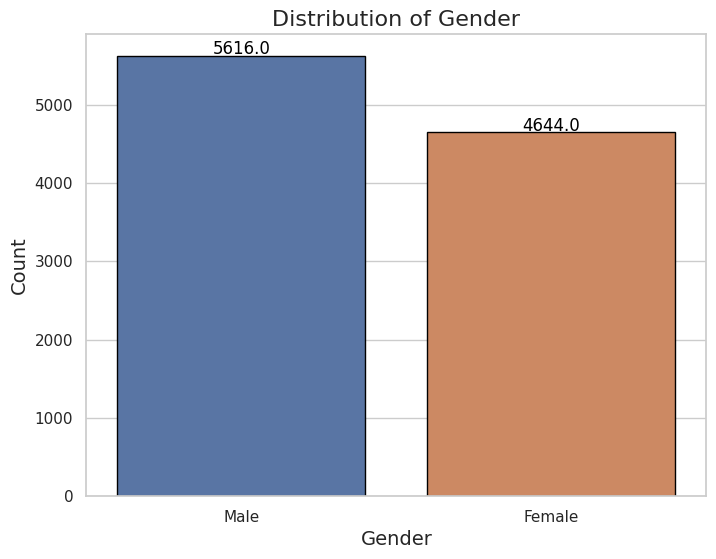

In [24]:
# Create the count plot with customized parameters
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Gender", data=df2, edgecolor='black')

# Customizing the plot further
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Distribution of Gender", fontsize=16)

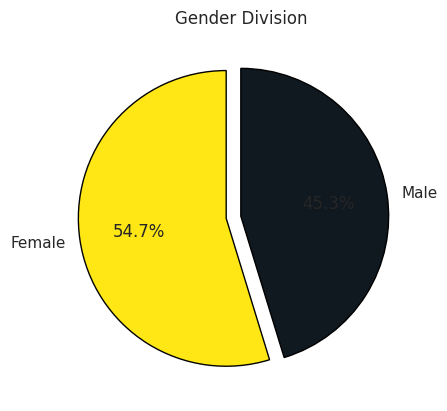

In [25]:

l = list(df2['Gender'].value_counts())
circle = [l[0] / len(l) * 100, l[1] / len(l) * 100]
colors = ['#FEE715','#101820']

plt.pie(circle,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender Division');


plt.show()

In [26]:
print(df2.dtypes)

# Identify categorical columns
categorical_columns = df2.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical columns
numerical_columns = df2.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Gender            object
Married           object
Age                int64
Graduated         object
Profession        object
SpendingScore     object
FamilySize       float64
dtype: object
Categorical Columns: ['Gender', 'Married', 'Graduated', 'Profession', 'SpendingScore']
Numerical Columns: ['Age', 'FamilySize']


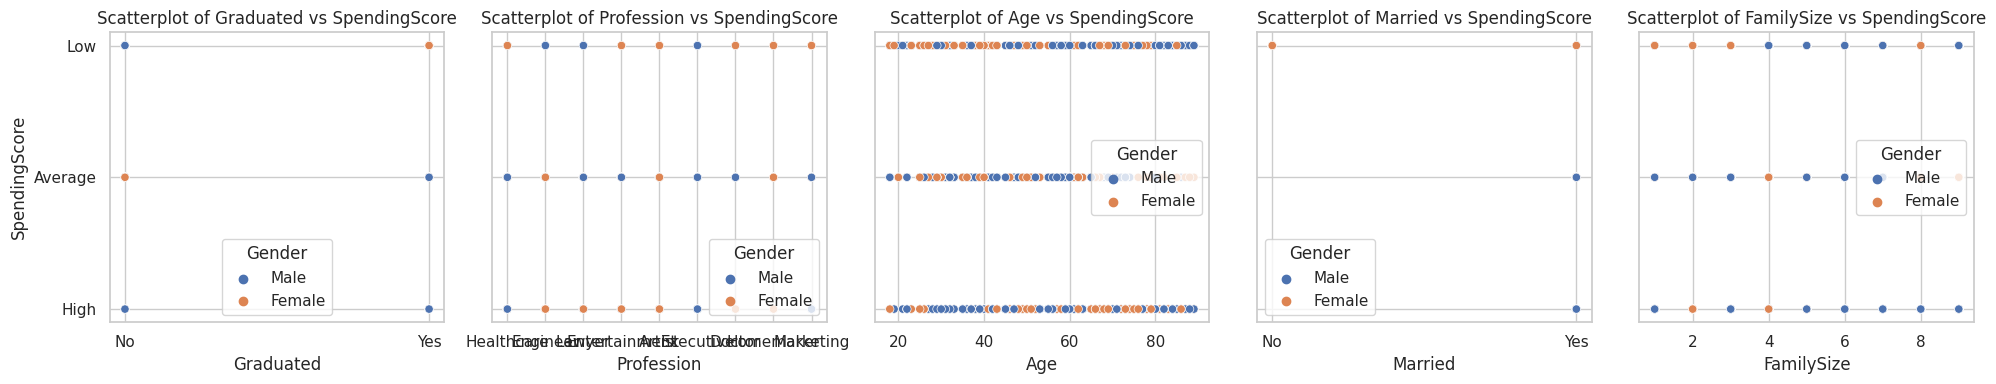

In [27]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# List of columns for x-axis
x_columns = ["Graduated", "Profession", "Age", "Married", "FamilySize"]

# Plot scatterplots
for i, column in enumerate(x_columns):
    sns.scatterplot(data=df2, x=column, y='SpendingScore', hue='Gender', ax=axes[i])
    axes[i].set_title(f'Scatterplot of {column} vs SpendingScore')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='Profession', ylabel='count'>

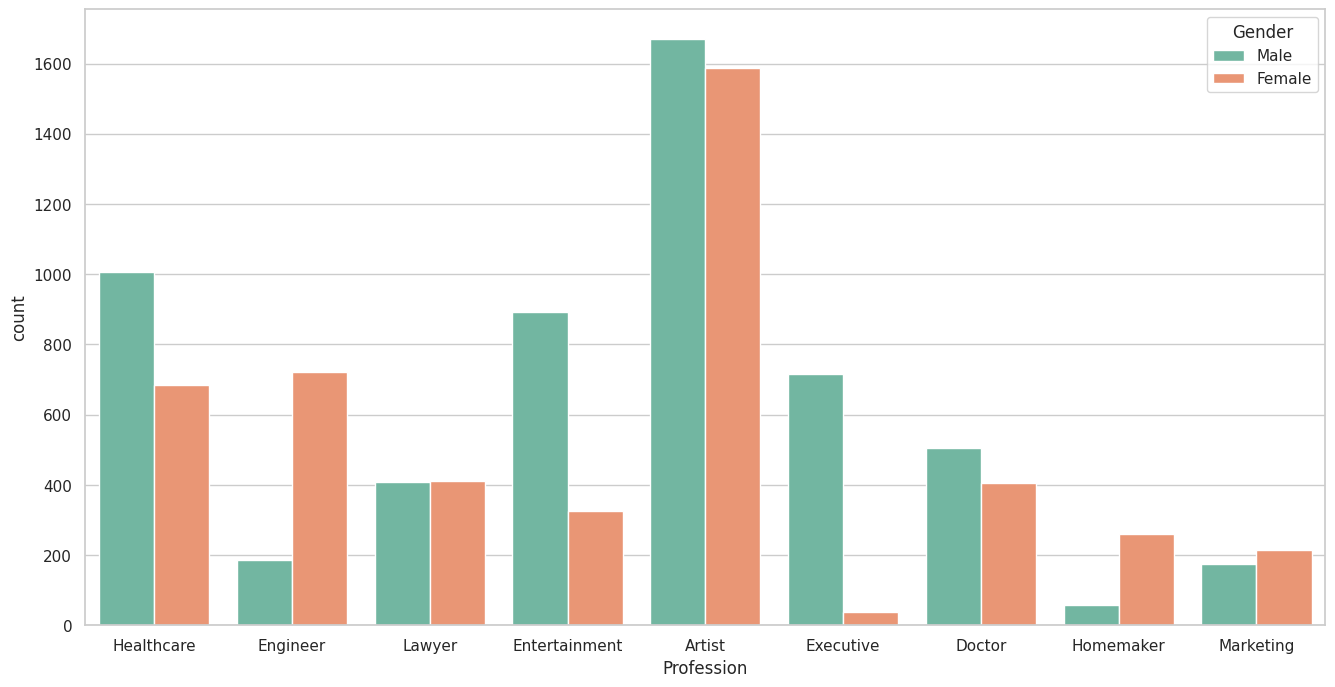

In [28]:
# Define the size of the figure
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

# Create the countplot
sns.countplot(data=df2, x="Profession", hue="Gender", palette="Set2")

<Axes: xlabel='Profession', ylabel='count'>

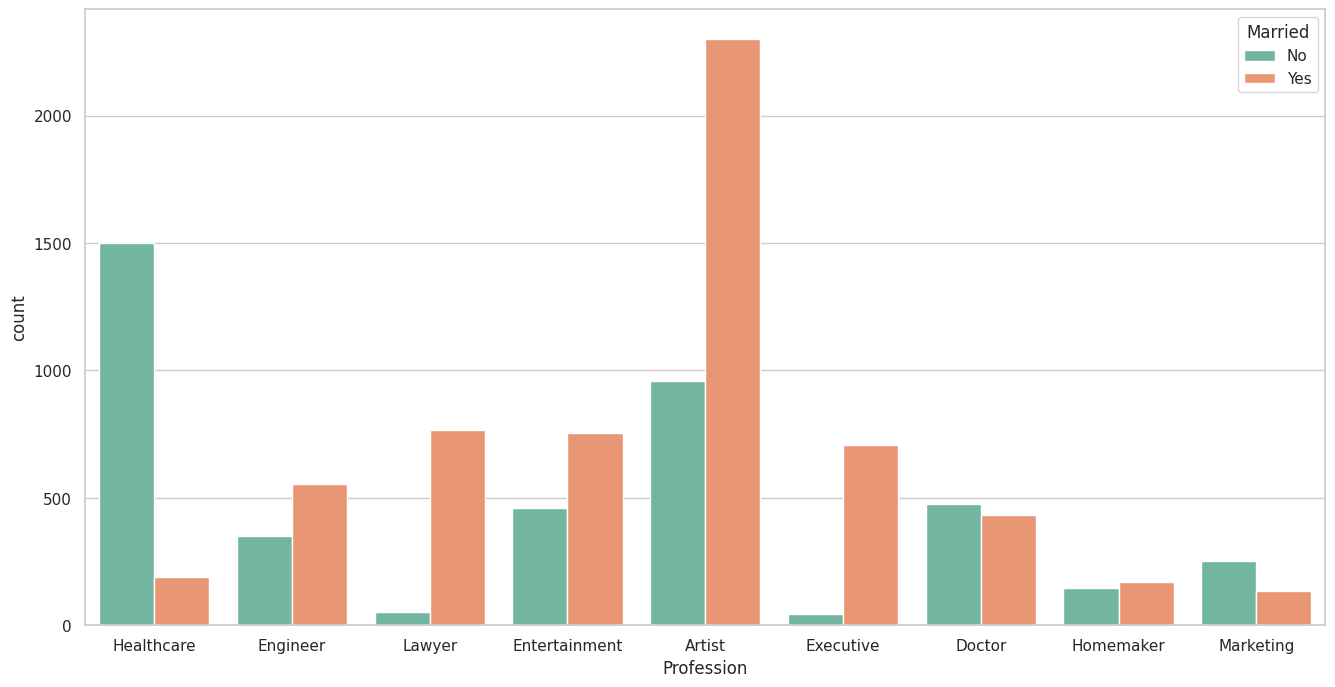

In [29]:
# Define the size of the figure
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

# Create the countplot
sns.countplot(data=df2, x="Profession", hue="Married", palette="Set2")

<Axes: xlabel='SpendingScore', ylabel='count'>

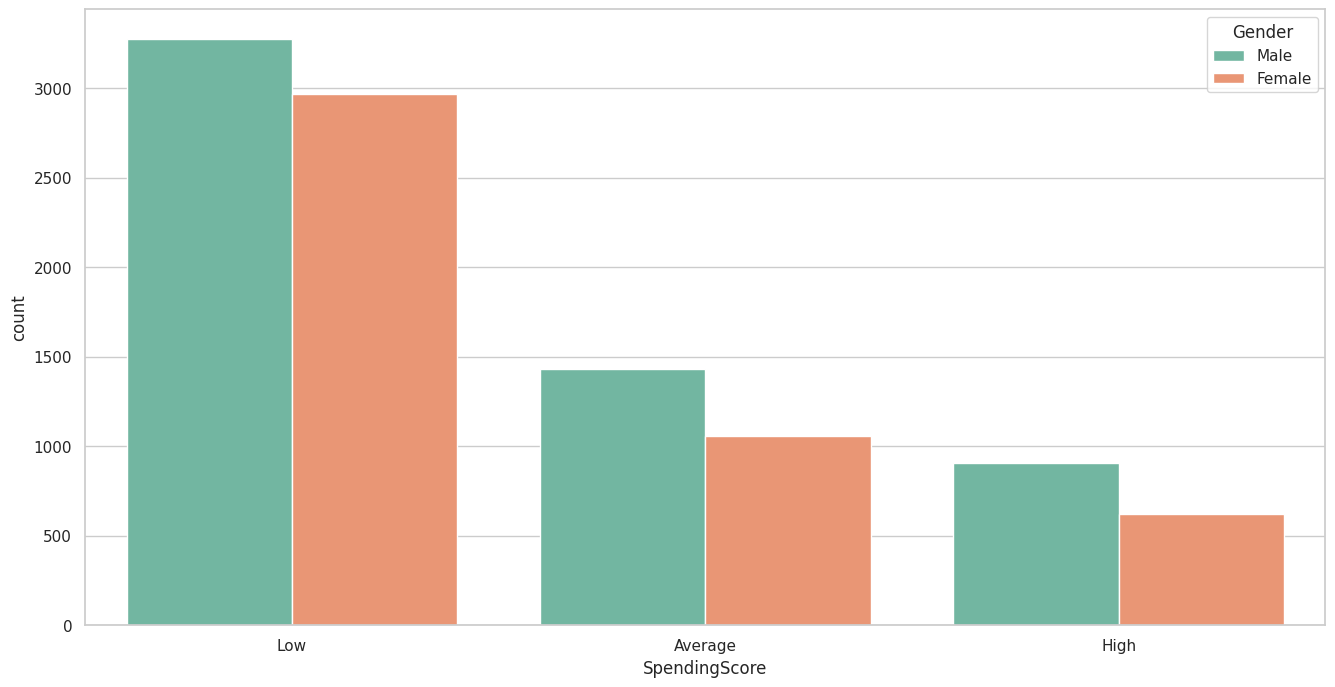

In [30]:
# Define the size of the figure
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

# Create the countplot
sns.countplot(data=df2, x="SpendingScore", hue="Gender", palette="Set2")

<Axes: xlabel='SpendingScore', ylabel='count'>

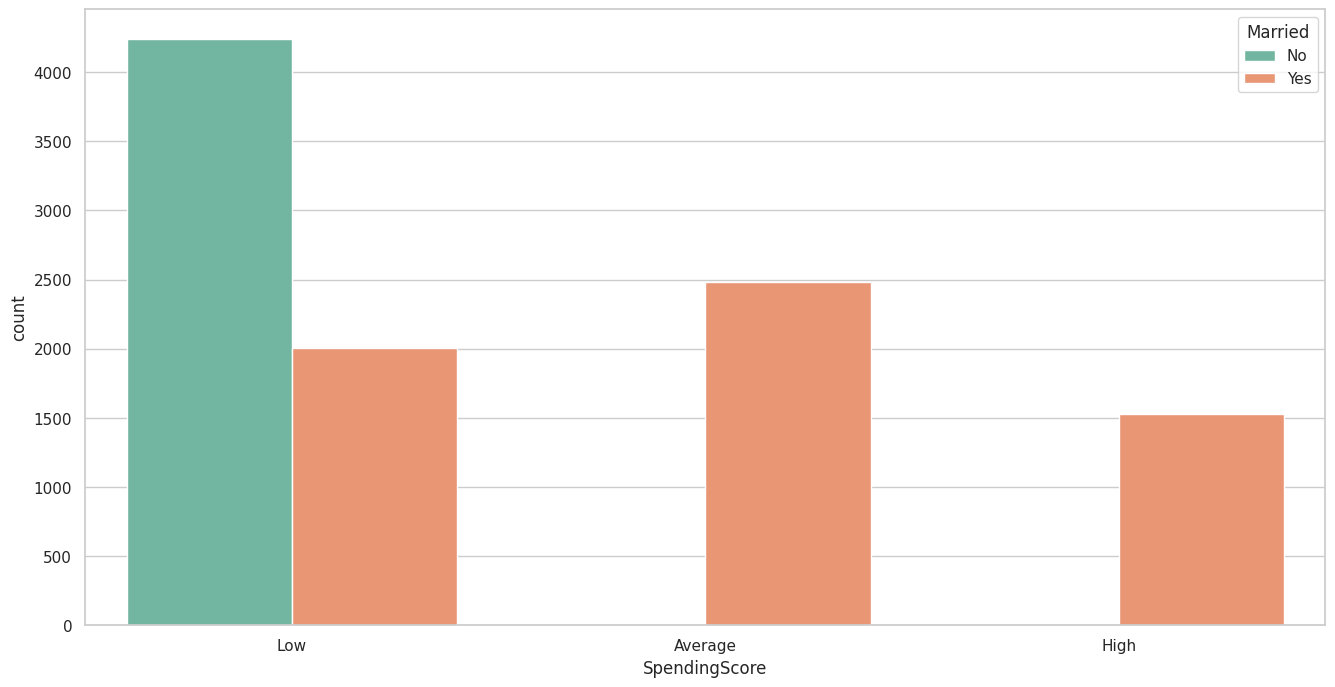

In [31]:
# Define the size of the figure
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

# Create the countplot
sns.countplot(data=df2, x="SpendingScore", hue="Married", palette="Set2")

<Axes: xlabel='FamilySize', ylabel='count'>

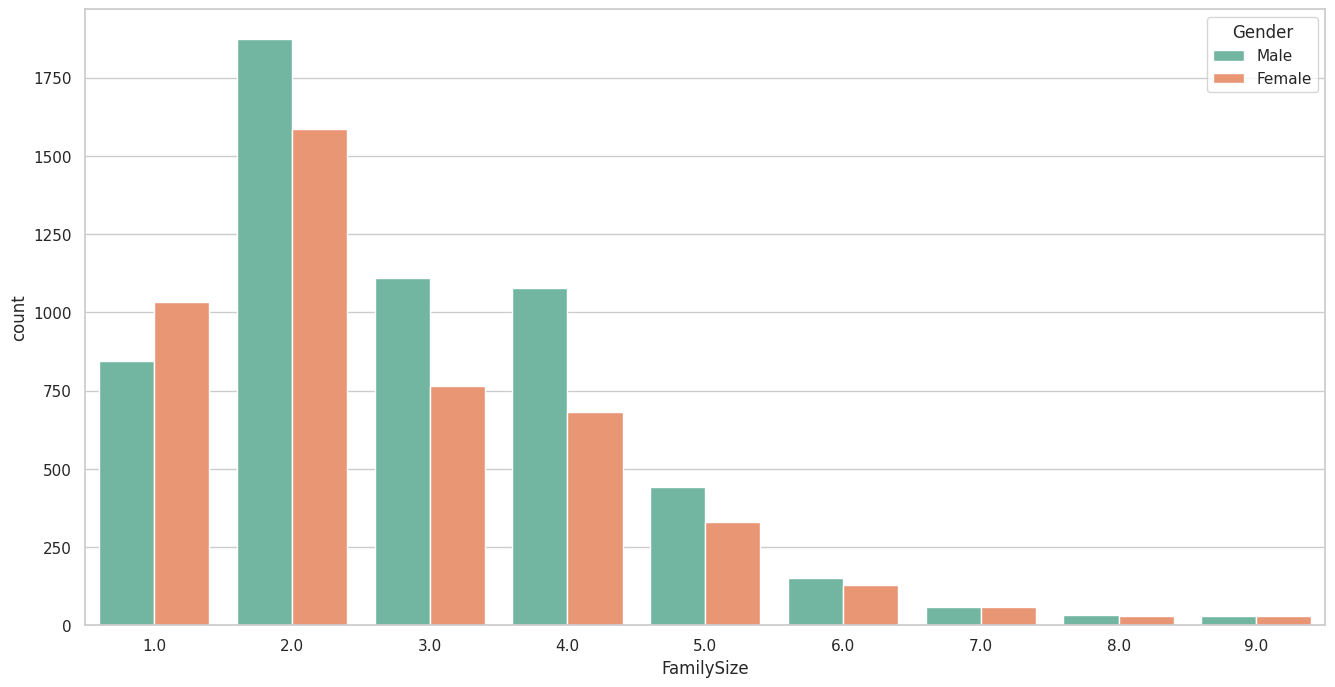

In [32]:
# Define the size of the figure
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

# Create the countplot
sns.countplot(data=df2, x="FamilySize", hue="Gender", palette="Set2")

<Axes: xlabel='FamilySize', ylabel='count'>

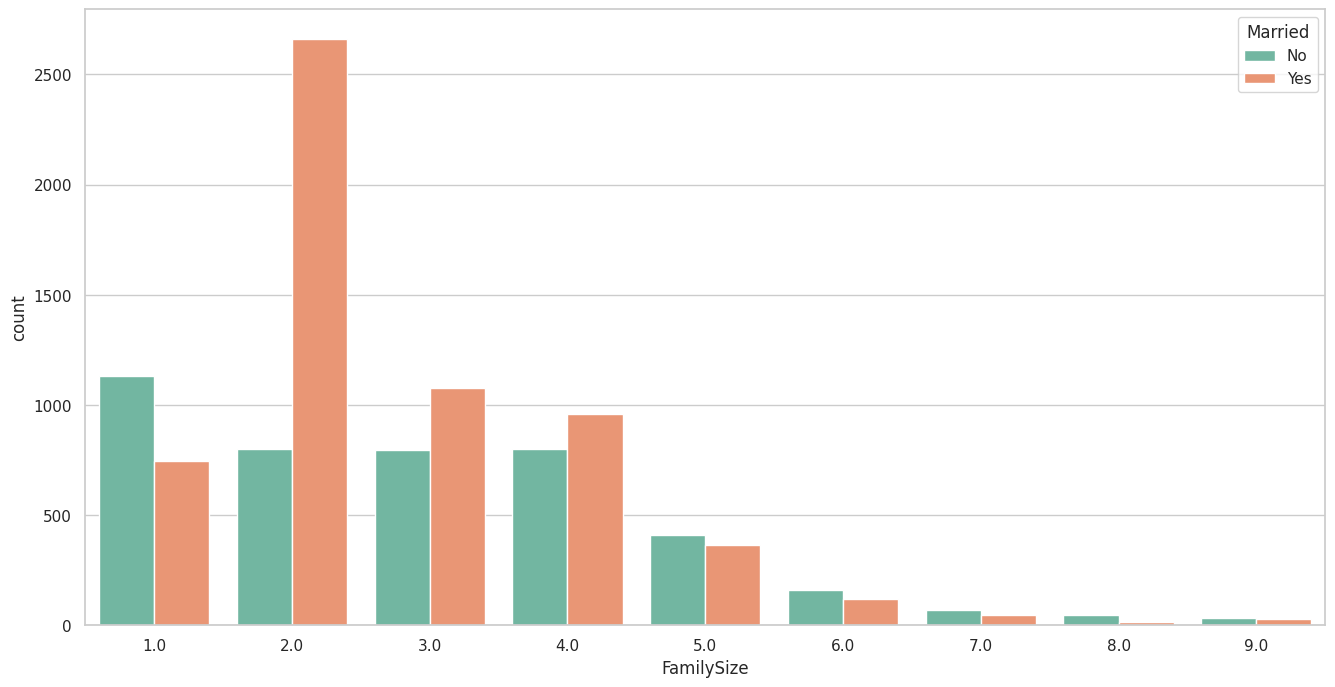

In [33]:
# Define the size of the figure
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

# Create the countplot
sns.countplot(data=df2, x="FamilySize", hue="Married", palette="Set2")

<Axes: xlabel='Graduated', ylabel='count'>

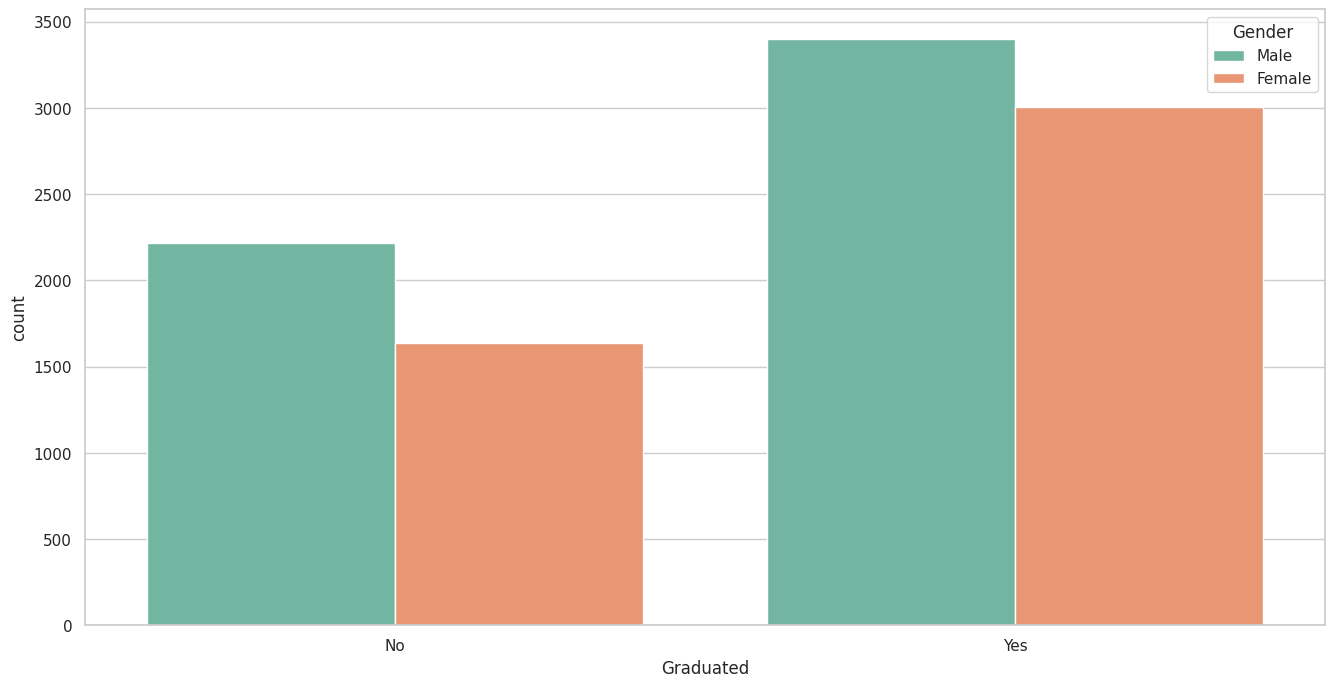

In [34]:
# Define the size of the figure
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

# Create the countplot
sns.countplot(data=df2, x="Graduated", hue="Gender", palette="Set2")

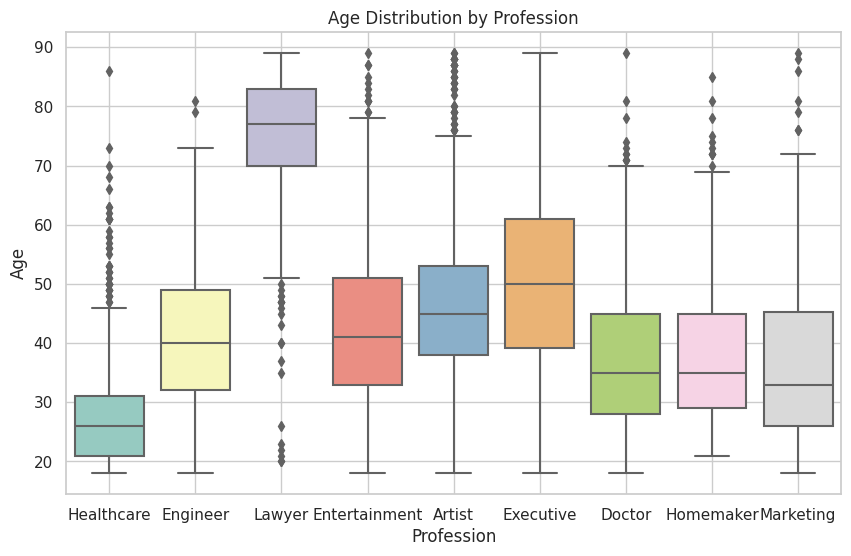

In [35]:
# Hypothesis: Certain professions have higher average ages
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x="Profession", y="Age", palette="Set3")
plt.title("Age Distribution by Profession")
plt.xlabel("Profession")
plt.ylabel("Age")
plt.grid(True)
plt.show()

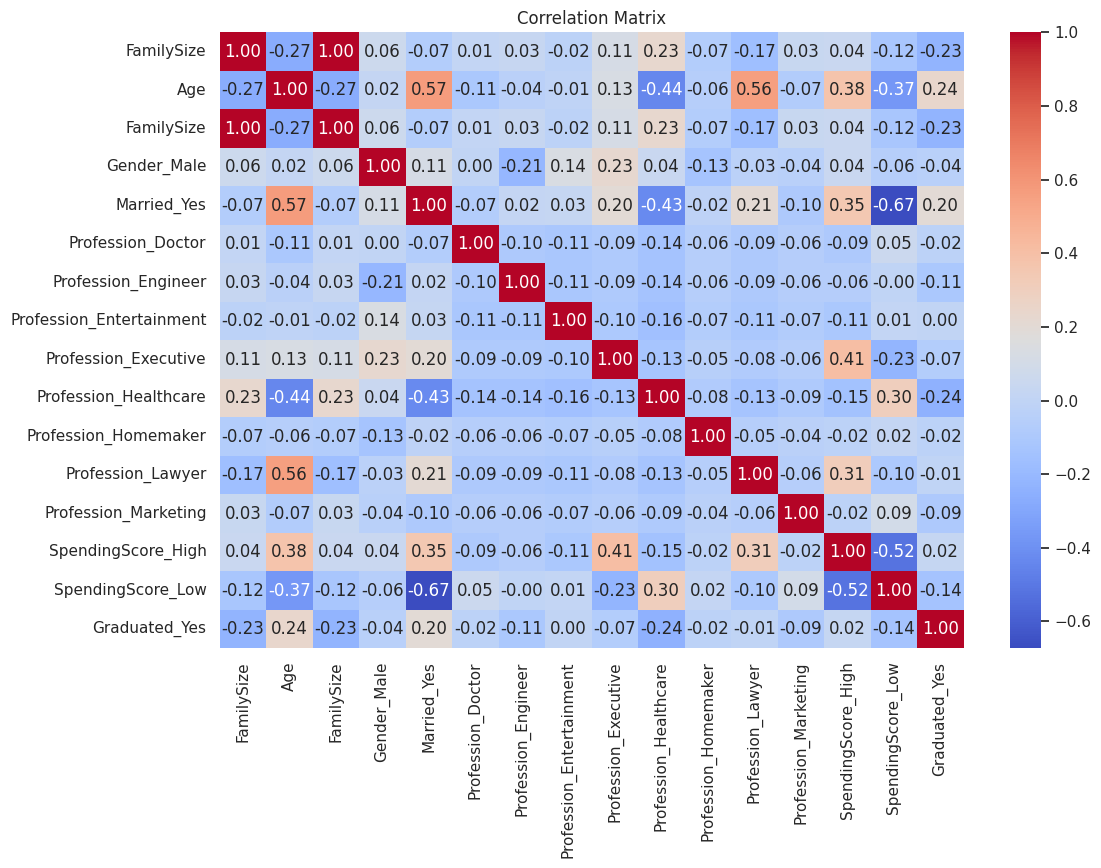

In [36]:
# Assuming df is your DataFrame
# Assuming 'categorical_features' is a list of categorical features
# Assuming 'numerical_features' is a list of numerical features

# Convert categorical features to numerical representation
categorical_features = ["Gender", "Married", "Profession", "SpendingScore", "FamilySize", "Graduated"]
numerical_features=['FamilySize', 'Age']


df_encoded = pd.get_dummies(df2[categorical_features], drop_first=True)

# Concatenate numerical features with encoded categorical features
df_combined = pd.concat([df2[numerical_features], df_encoded], axis=1)

# Calculate correlation matrix
corr_matrix = df_combined.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

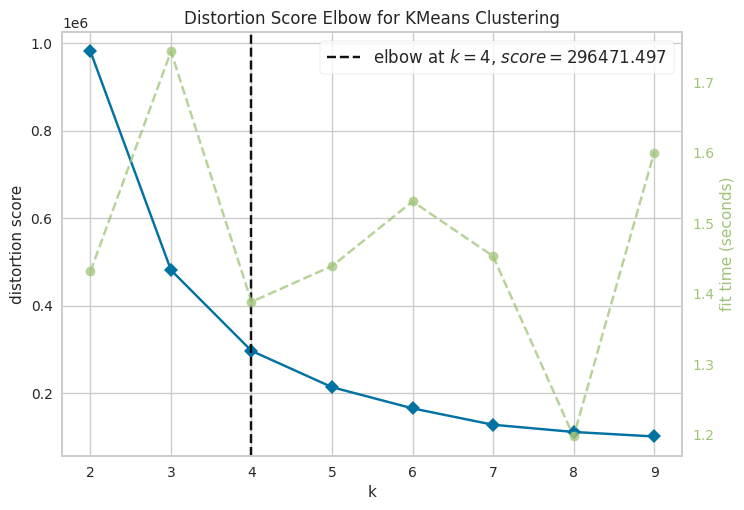

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Elbow Method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_combined)
visualizer.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

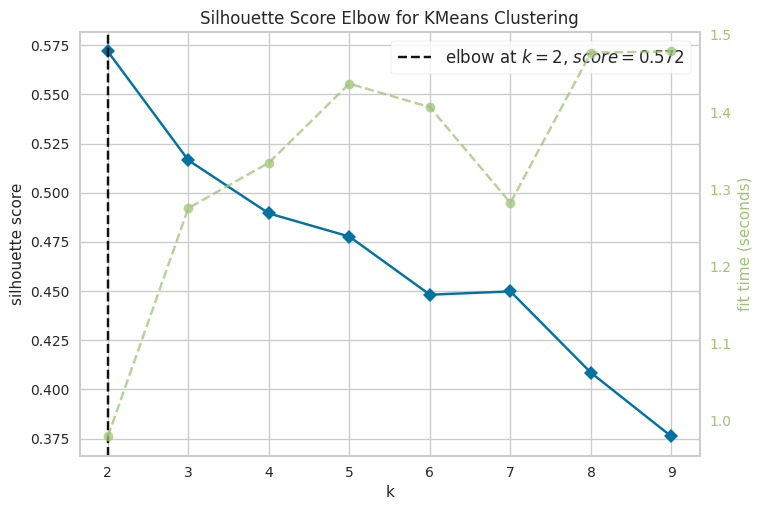

In [38]:
# silhouette
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(df_combined)
visualizer.show()
plt.show()

In [39]:
# found optimal clusters (4)
KM_4_clusters = KMeans(n_clusters=4, init='k-means++').fit(df_combined) # initialise and fit K-Means model
KM4_clustered = df_combined.copy()
KM4_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_ # append labels to points
df2.loc[:,'Cluster']= KM_4_clusters.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
KM4_clustered.head()

,FamilySize,Age,FamilySize,Gender_Male,Married_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,SpendingScore_High,SpendingScore_Low,Graduated_Yes,Cluster
0,4.0,22,4.0,True,False,False,False,False,False,True,False,False,False,False,True,False,3
1,3.0,38,3.0,False,True,False,True,False,False,False,False,False,False,False,False,True,0
2,1.0,67,1.0,False,True,False,True,False,False,False,False,False,False,False,True,True,1
3,2.0,67,2.0,True,True,False,False,False,False,False,False,True,False,True,False,True,1
4,6.0,40,6.0,False,True,False,False,True,False,False,False,False,False,True,False,True,0


In [41]:
KM4_clustered['Cluster'].value_counts()

Cluster
0    3232
3    3182
2    2451
1    1395
Name: count, dtype: int64

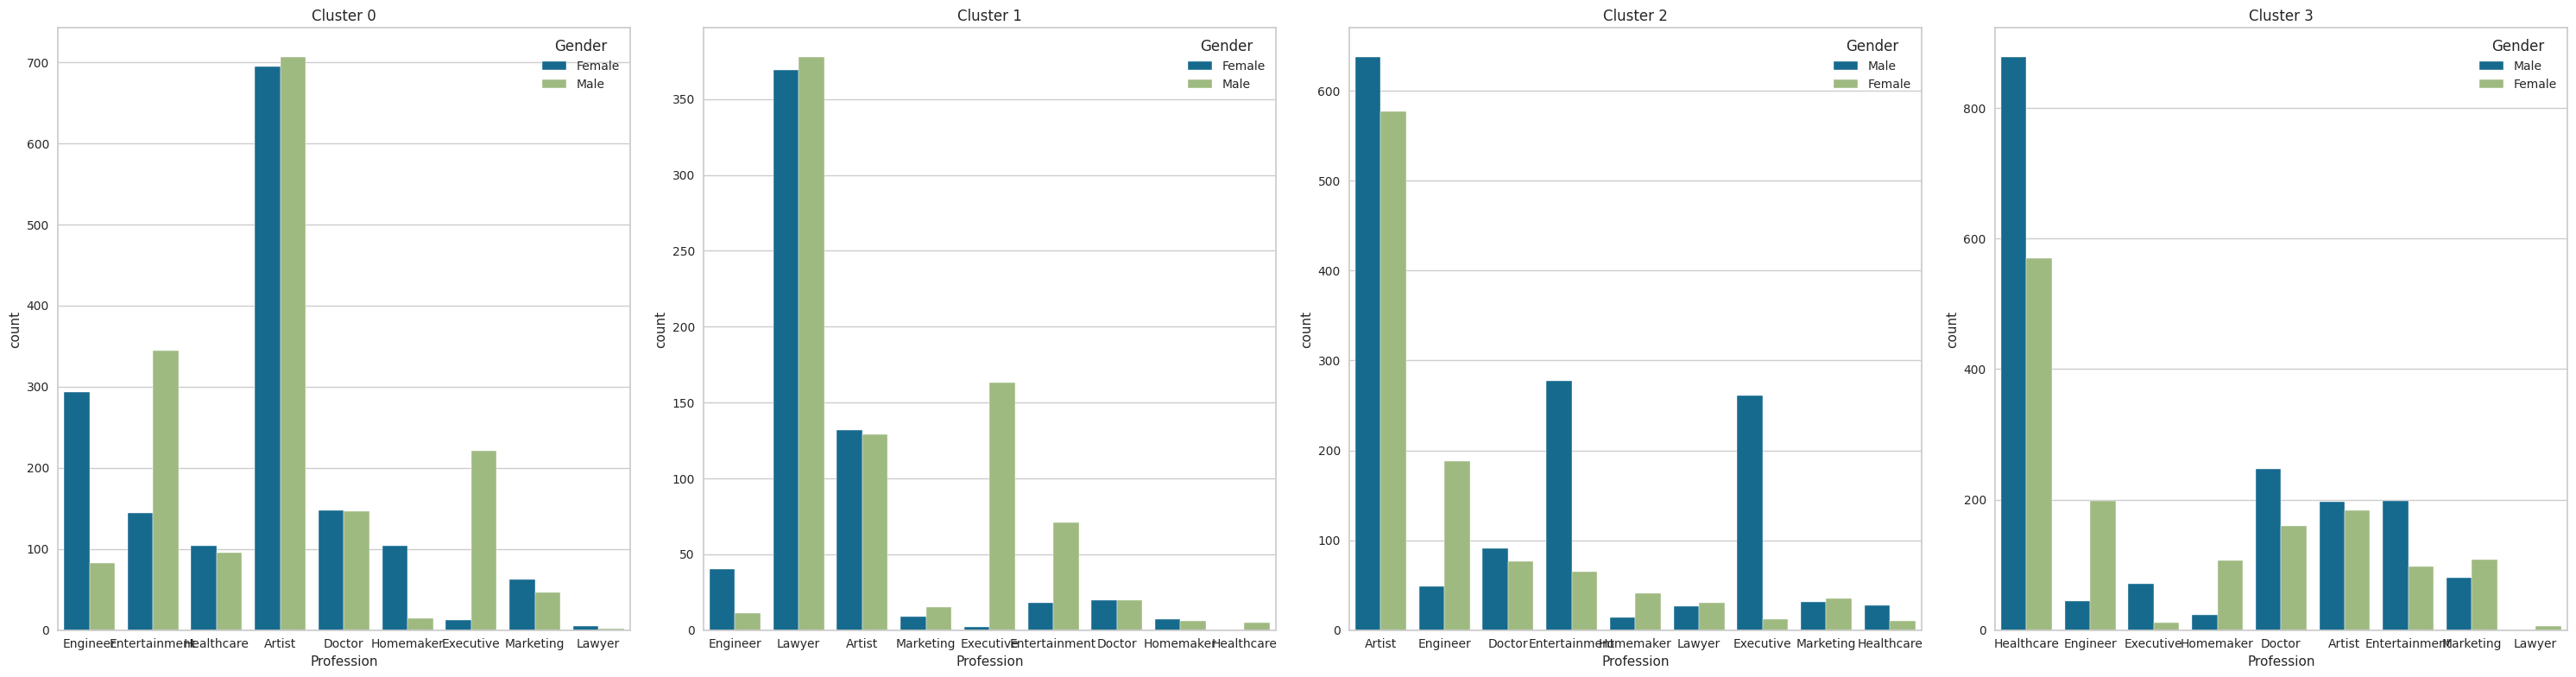

In [42]:
plt.figure(figsize=(30, 8))  # Adjust width and height as needed

# Set the number of clusters
num_clusters = 4

# Create subplots for each cluster
for cluster in range(0, num_clusters):
    plt.subplot(1, num_clusters, cluster+1)
    sns.countplot(data=df2[df2['Cluster'] == cluster], x='Profession', hue='Gender')
    plt.title(f'Cluster {cluster}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

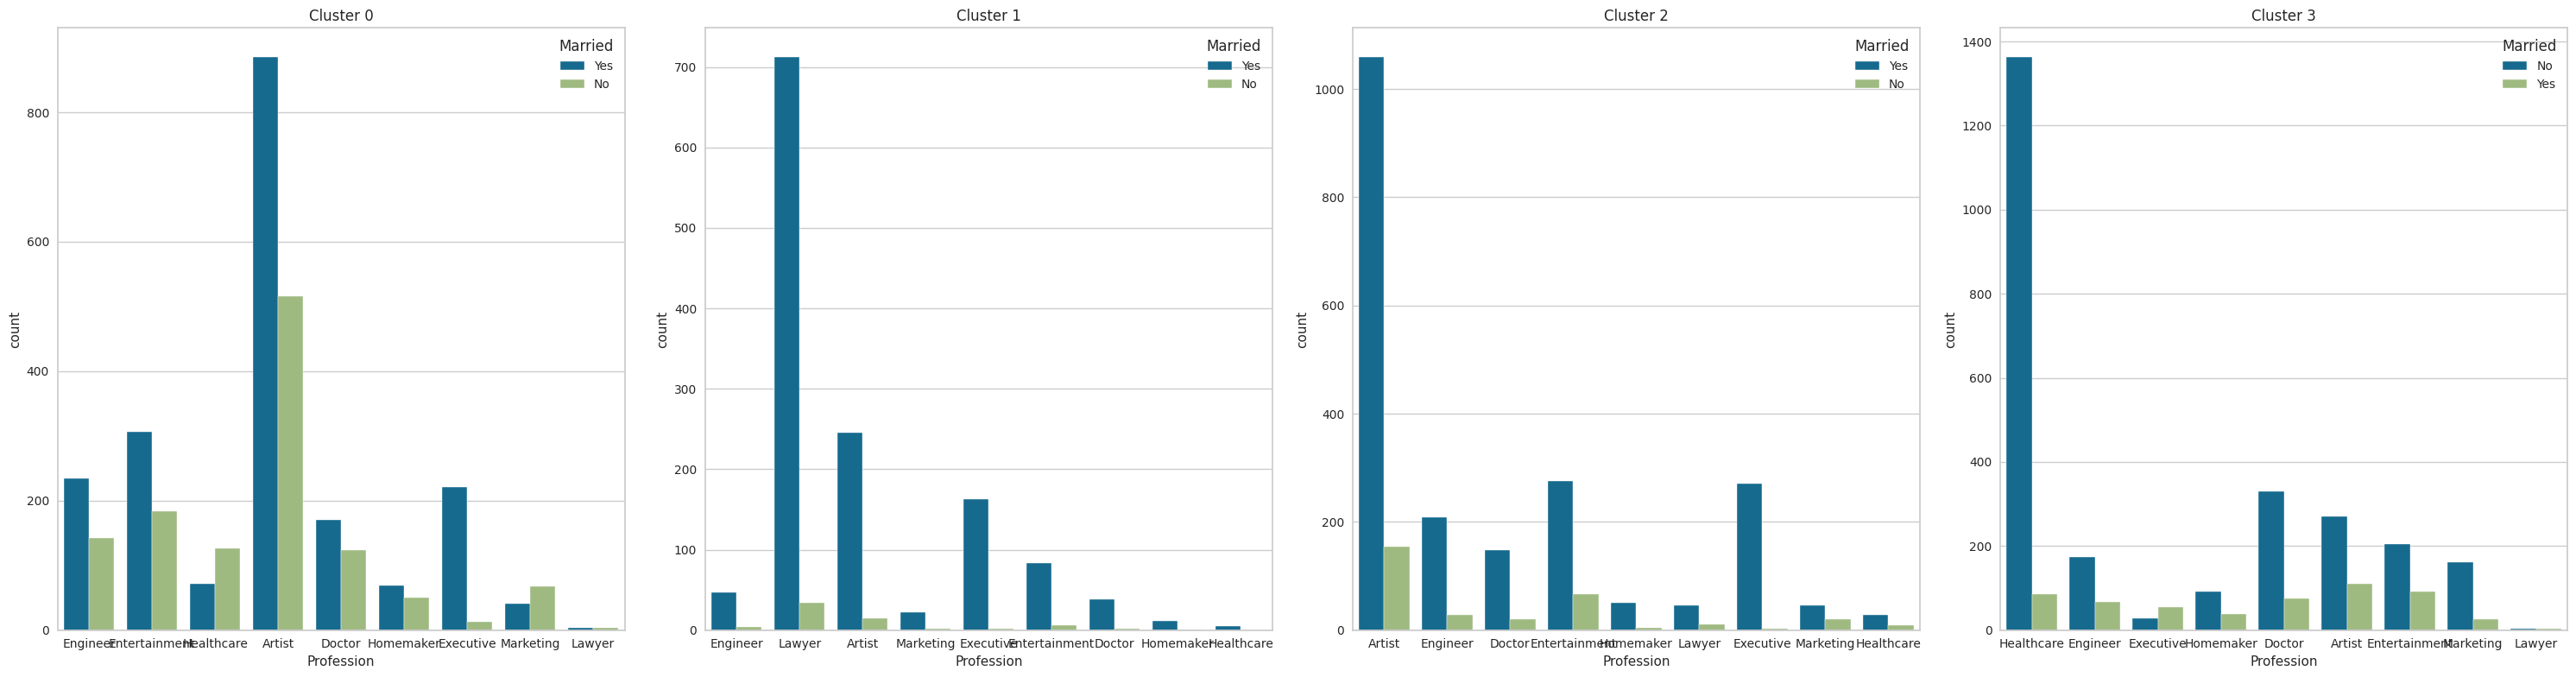

In [43]:
plt.figure(figsize=(30, 8))  # Adjust width and height as needed

# Set the number of clusters
num_clusters = 4

# Create subplots for each cluster
for cluster in range(0, num_clusters):
    plt.subplot(1, num_clusters, cluster+1)
    sns.countplot(data=df2[df2['Cluster'] == cluster], x='Profession', hue='Married')
    plt.title(f'Cluster {cluster}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

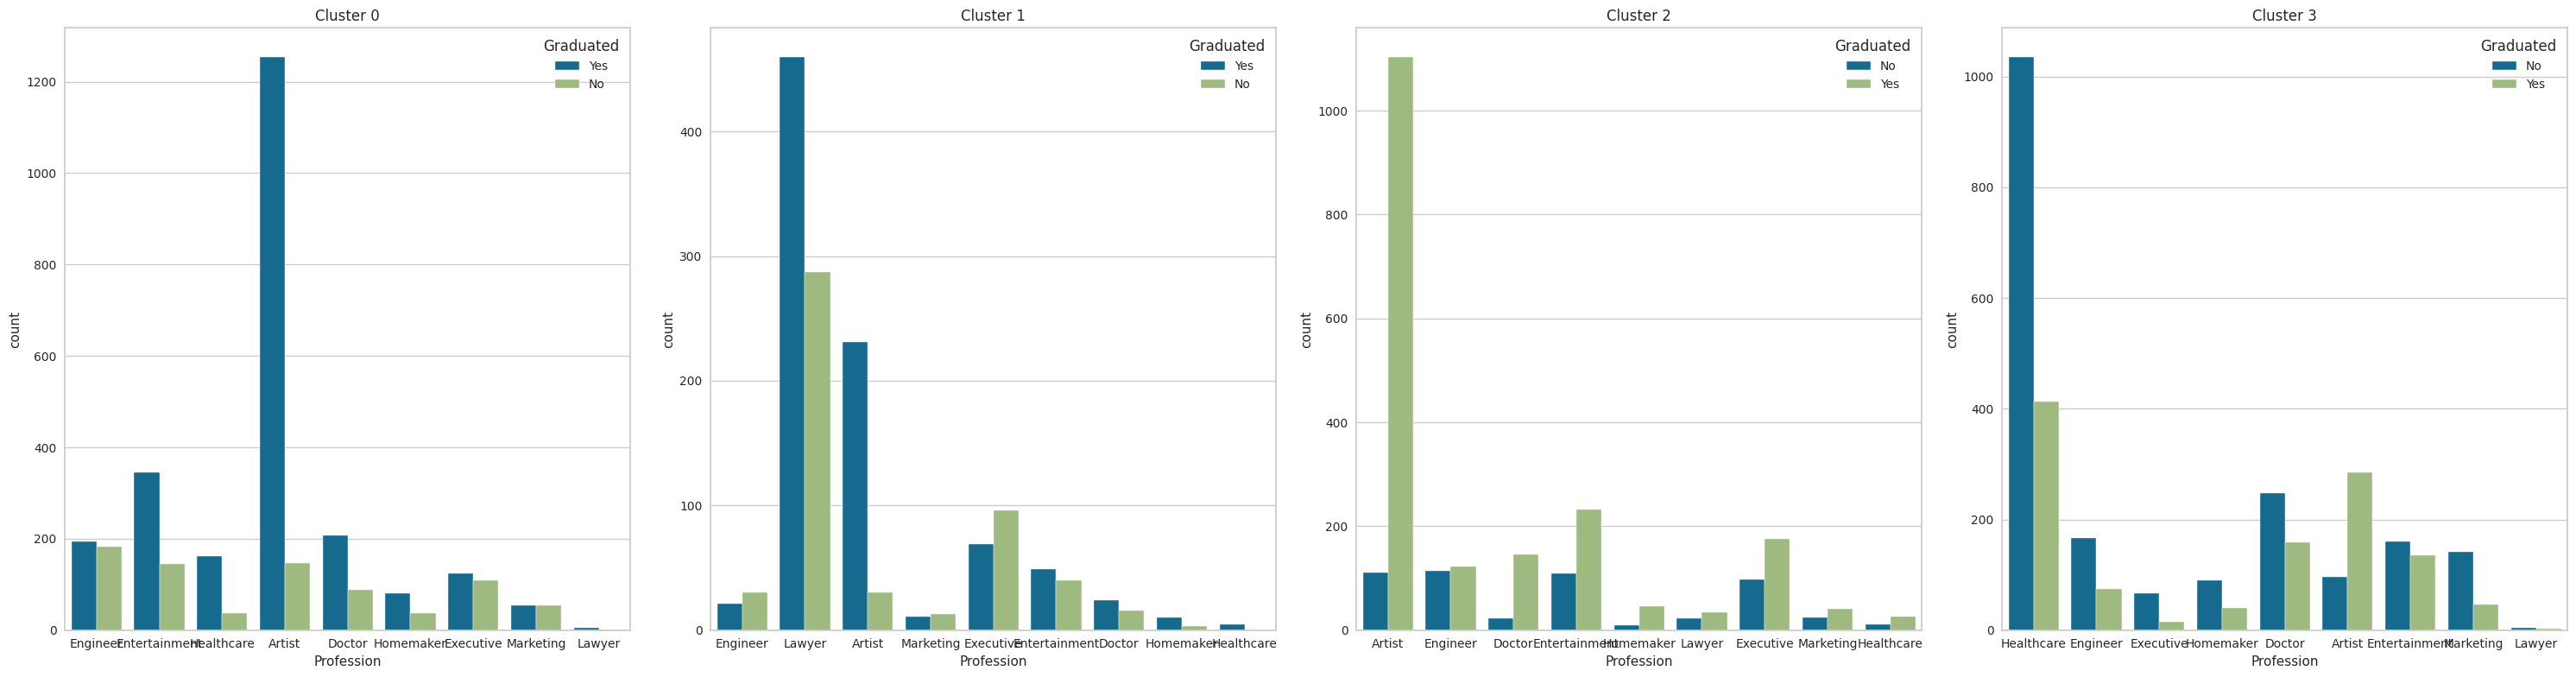

In [44]:
plt.figure(figsize=(30, 8))  # Adjust width and height as needed

# Set the number of clusters
num_clusters = 4

# Create subplots for each cluster
for cluster in range(0, num_clusters):
    plt.subplot(1, num_clusters, cluster+1)
    sns.countplot(data=df2[df2['Cluster'] == cluster], x='Profession', hue='Graduated')
    plt.title(f'Cluster {cluster}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

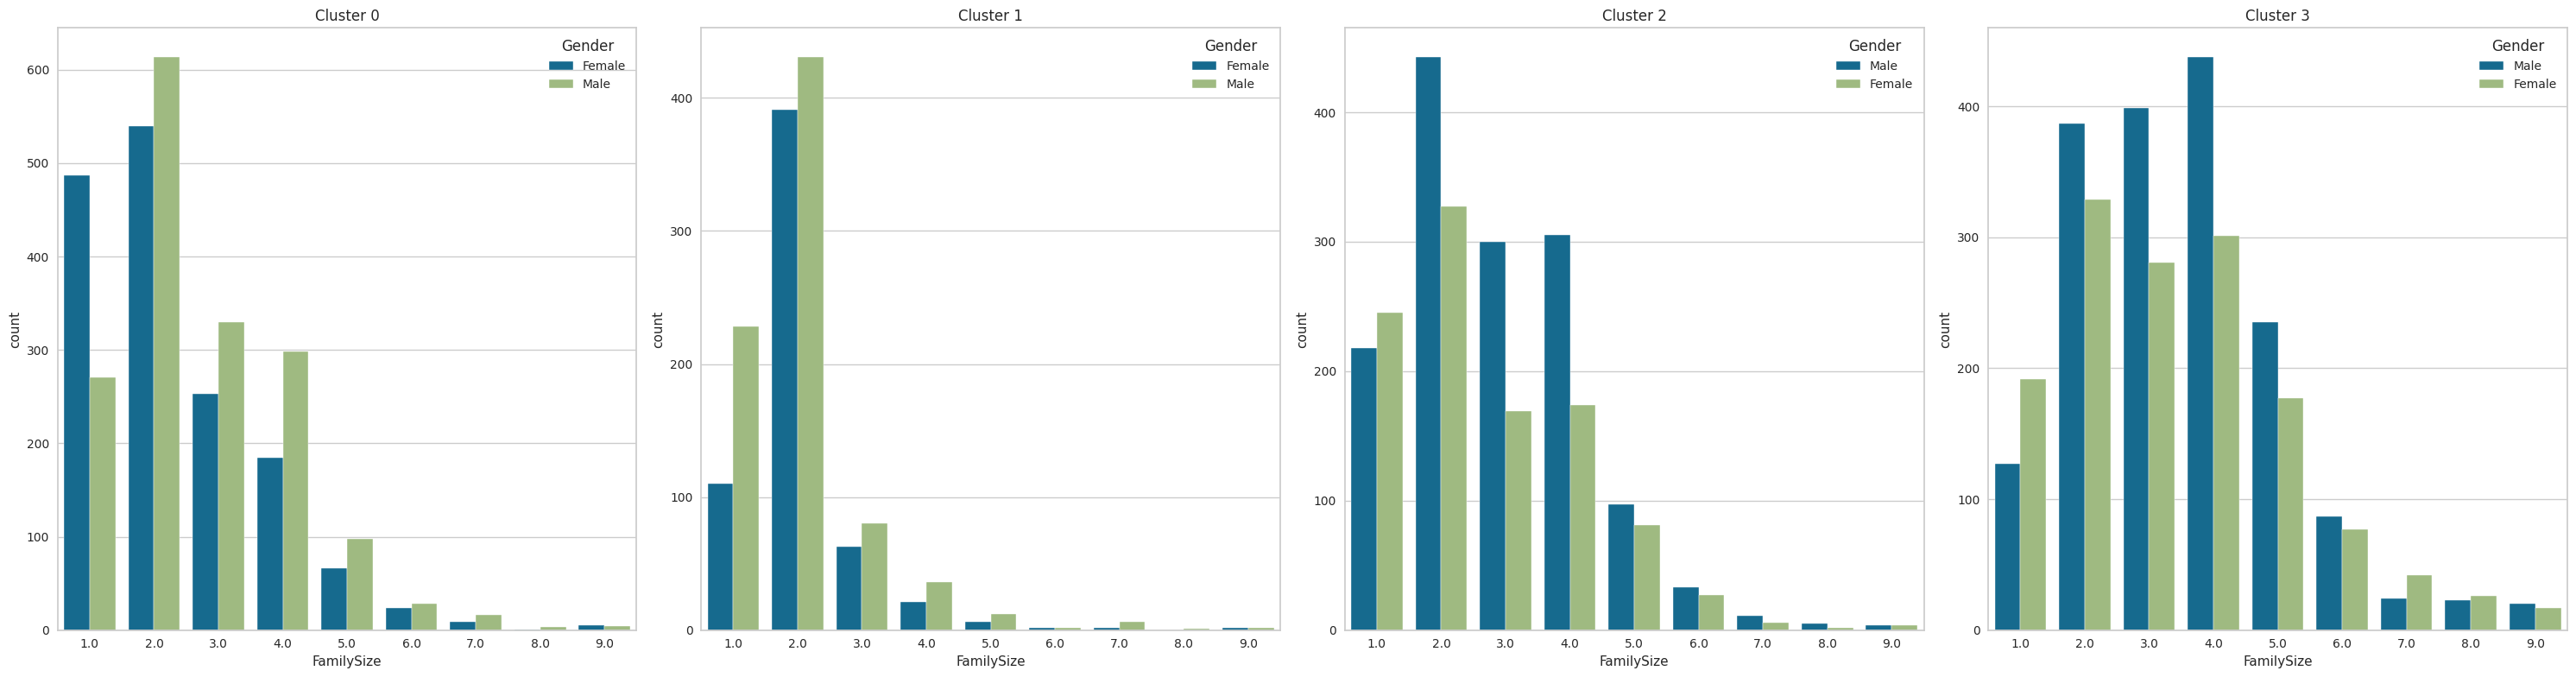

In [45]:
plt.figure(figsize=(30, 8))  # Adjust width and height as needed

# Set the number of clusters
num_clusters = 4

# Create subplots for each cluster
for cluster in range(0, num_clusters):
    plt.subplot(1, num_clusters, cluster+1)
    sns.countplot(data=df2[df2['Cluster'] == cluster], x='FamilySize', hue='Gender')
    plt.title(f'Cluster {cluster}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

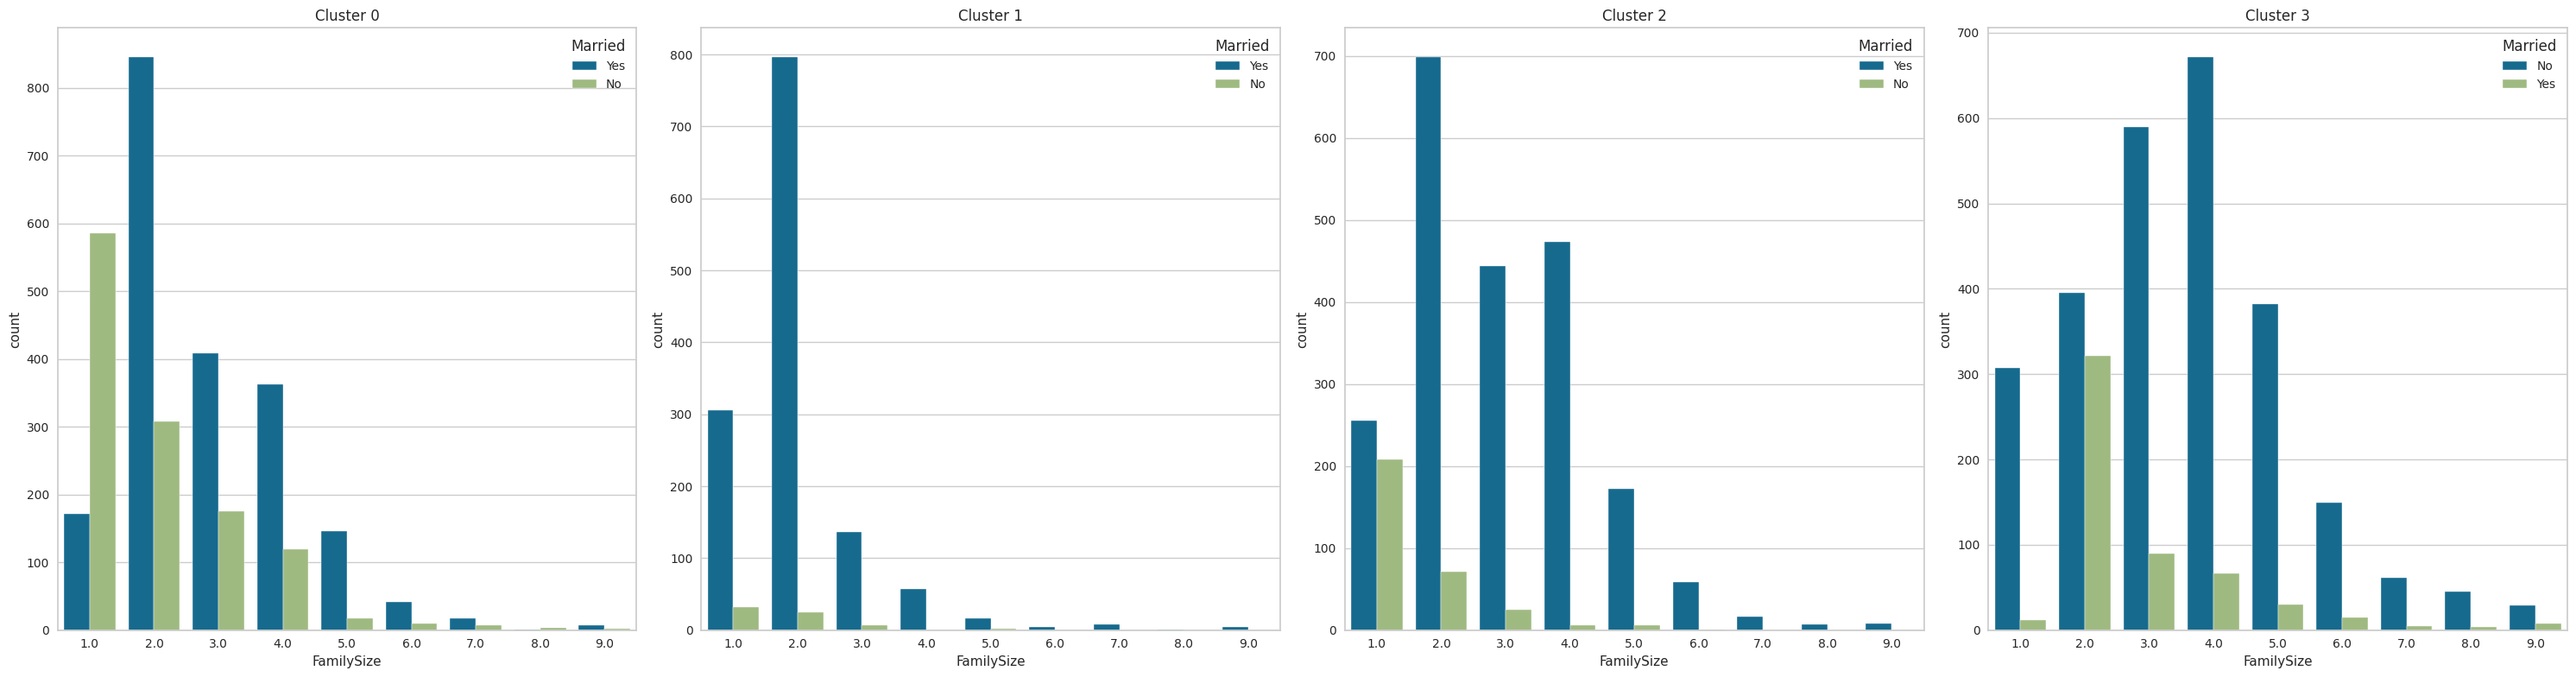

In [46]:
plt.figure(figsize=(30, 8))  # Adjust width and height as needed

# Set the number of clusters
num_clusters = 4

# Create subplots for each cluster
for cluster in range(0, num_clusters):
    plt.subplot(1, num_clusters, cluster+1)
    sns.countplot(data=df2[df2['Cluster'] == cluster], x='FamilySize', hue='Married')
    plt.title(f'Cluster {cluster}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

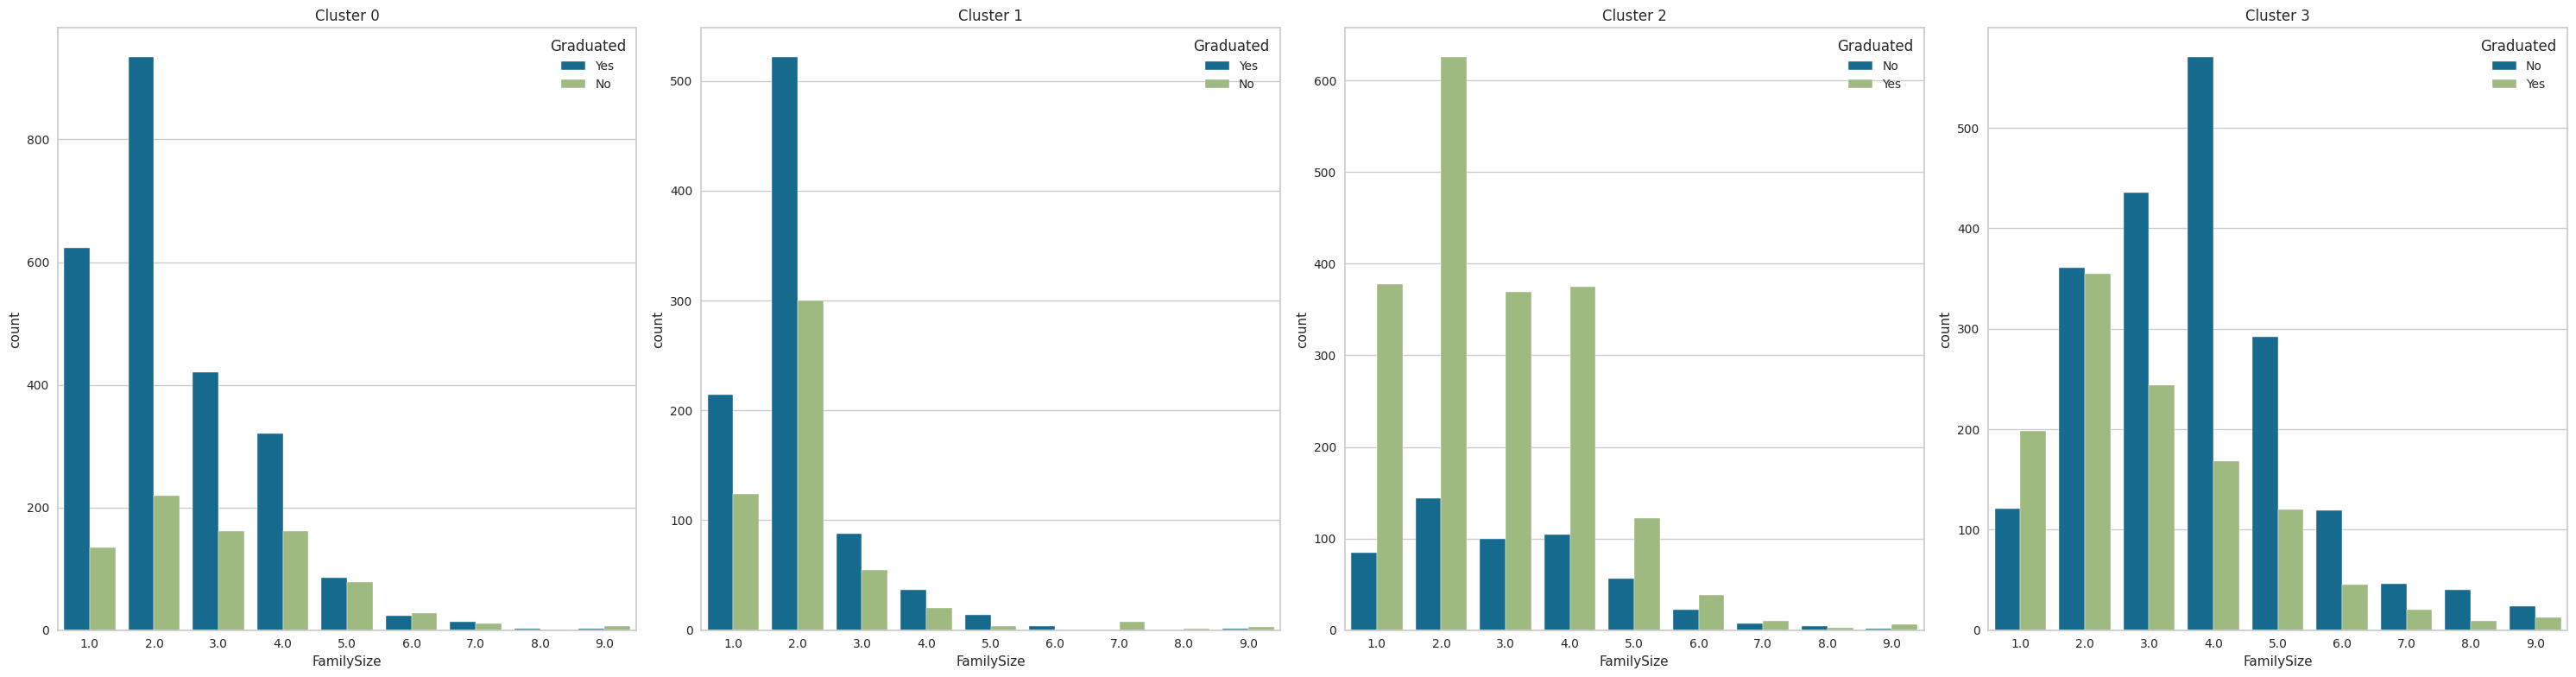

In [47]:
plt.figure(figsize=(30, 8))  # Adjust width and height as needed

# Set the number of clusters
num_clusters = 4

# Create subplots for each cluster
for cluster in range(0, num_clusters):
    plt.subplot(1, num_clusters, cluster+1)
    sns.countplot(data=df2[df2['Cluster'] == cluster], x='FamilySize', hue='Graduated')
    plt.title(f'Cluster {cluster}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

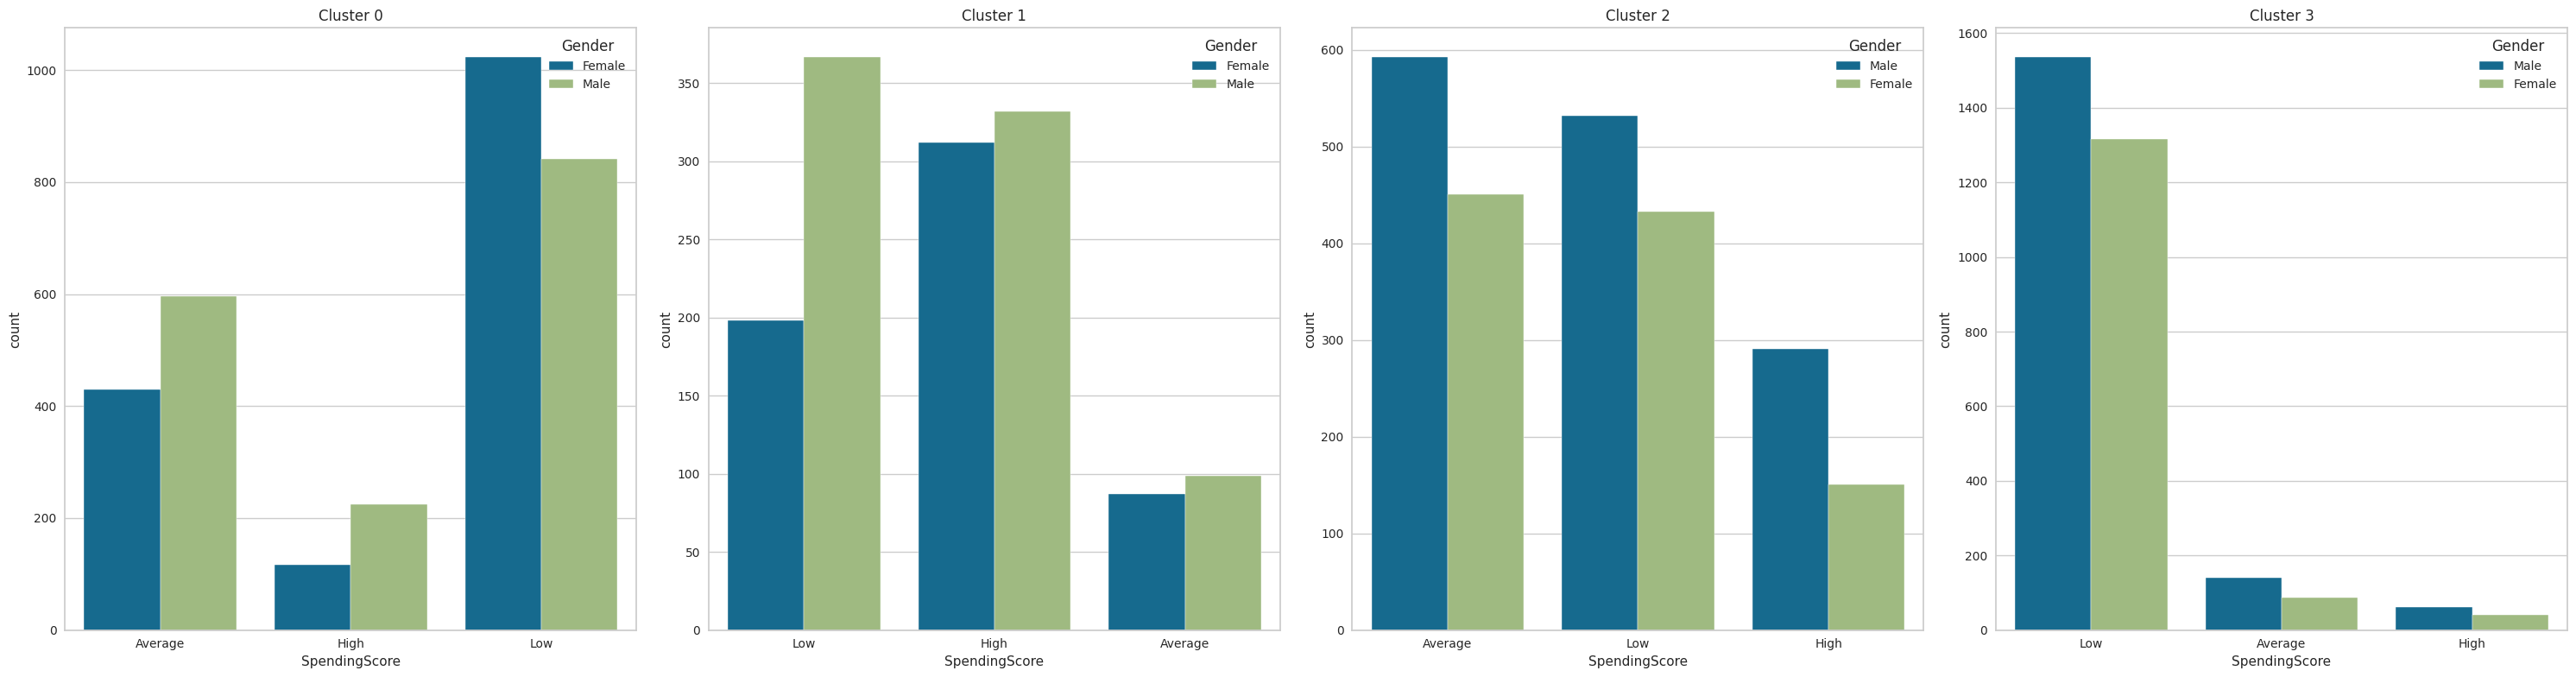

In [48]:
plt.figure(figsize=(30, 8))  # Adjust width and height as needed

# Set the number of clusters
num_clusters = 4

# Create subplots for each cluster
for cluster in range(0, num_clusters):
    plt.subplot(1, num_clusters, cluster+1)
    sns.countplot(data=df2[df2['Cluster'] == cluster], x='SpendingScore', hue='Gender')
    plt.title(f'Cluster {cluster}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

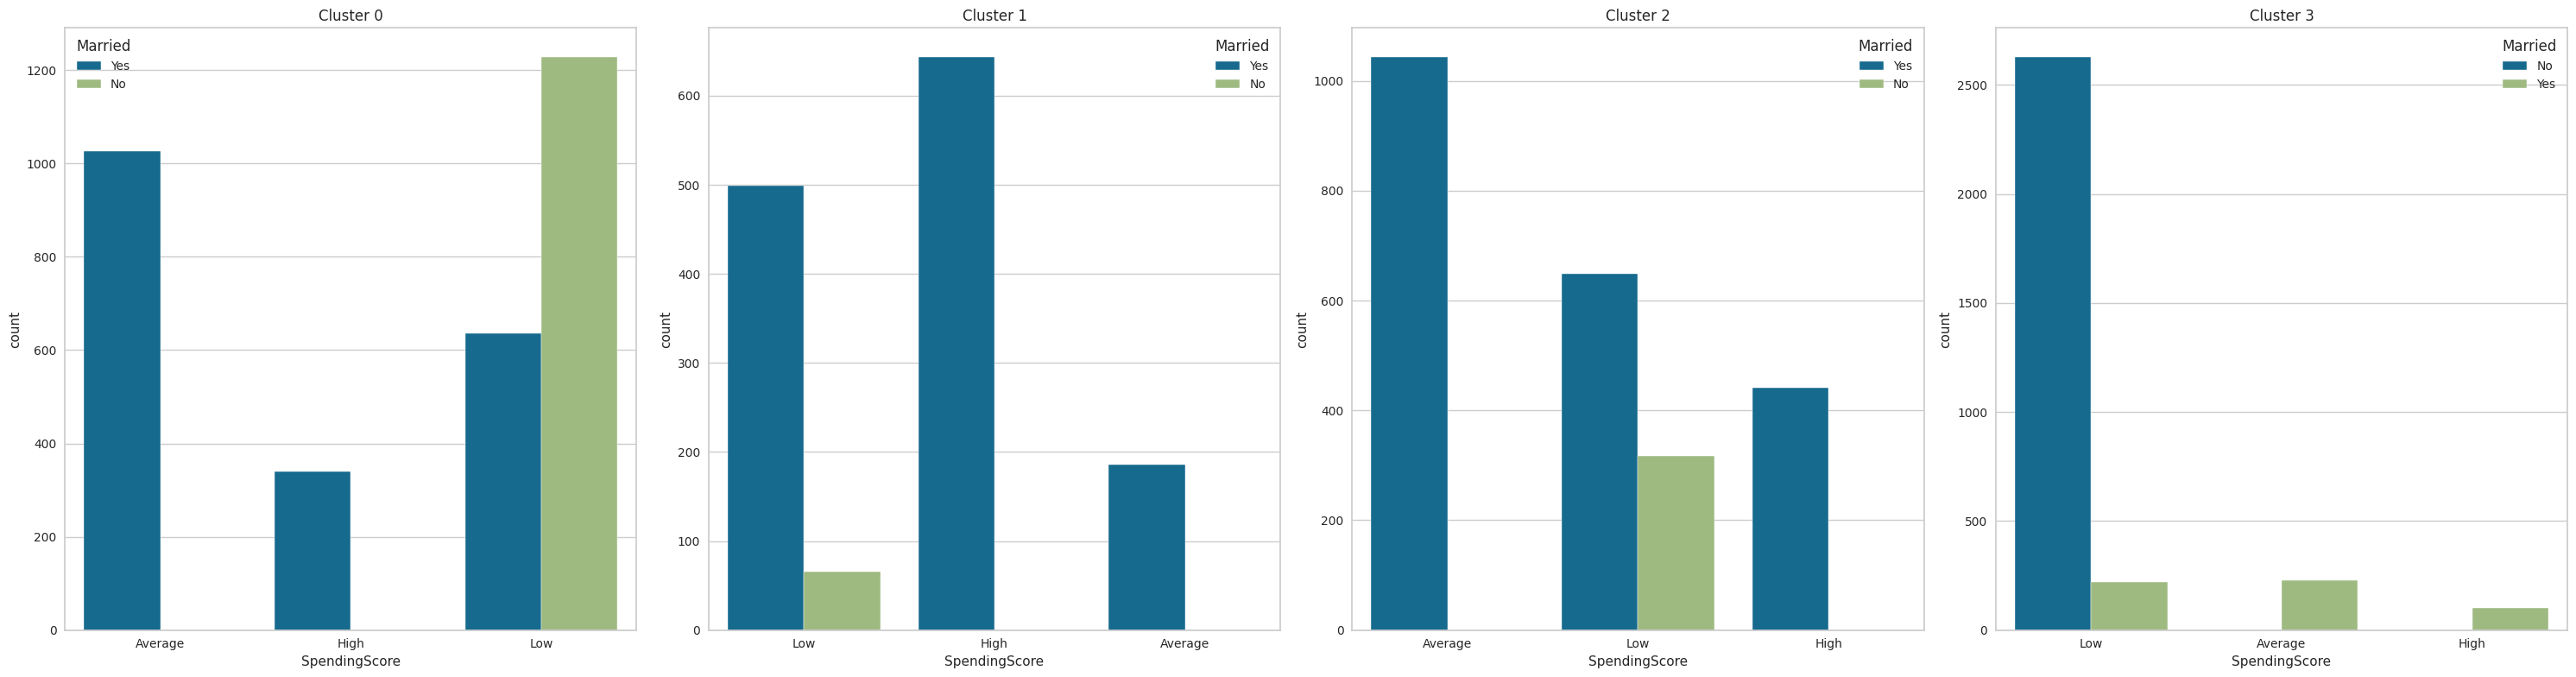

In [49]:
plt.figure(figsize=(30, 8))  # Adjust width and height as needed

# Set the number of clusters
num_clusters = 4

# Create subplots for each cluster
for cluster in range(0, num_clusters):
    plt.subplot(1, num_clusters, cluster+1)
    sns.countplot(data=df2[df2['Cluster'] == cluster], x='SpendingScore', hue='Married')
    plt.title(f'Cluster {cluster}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

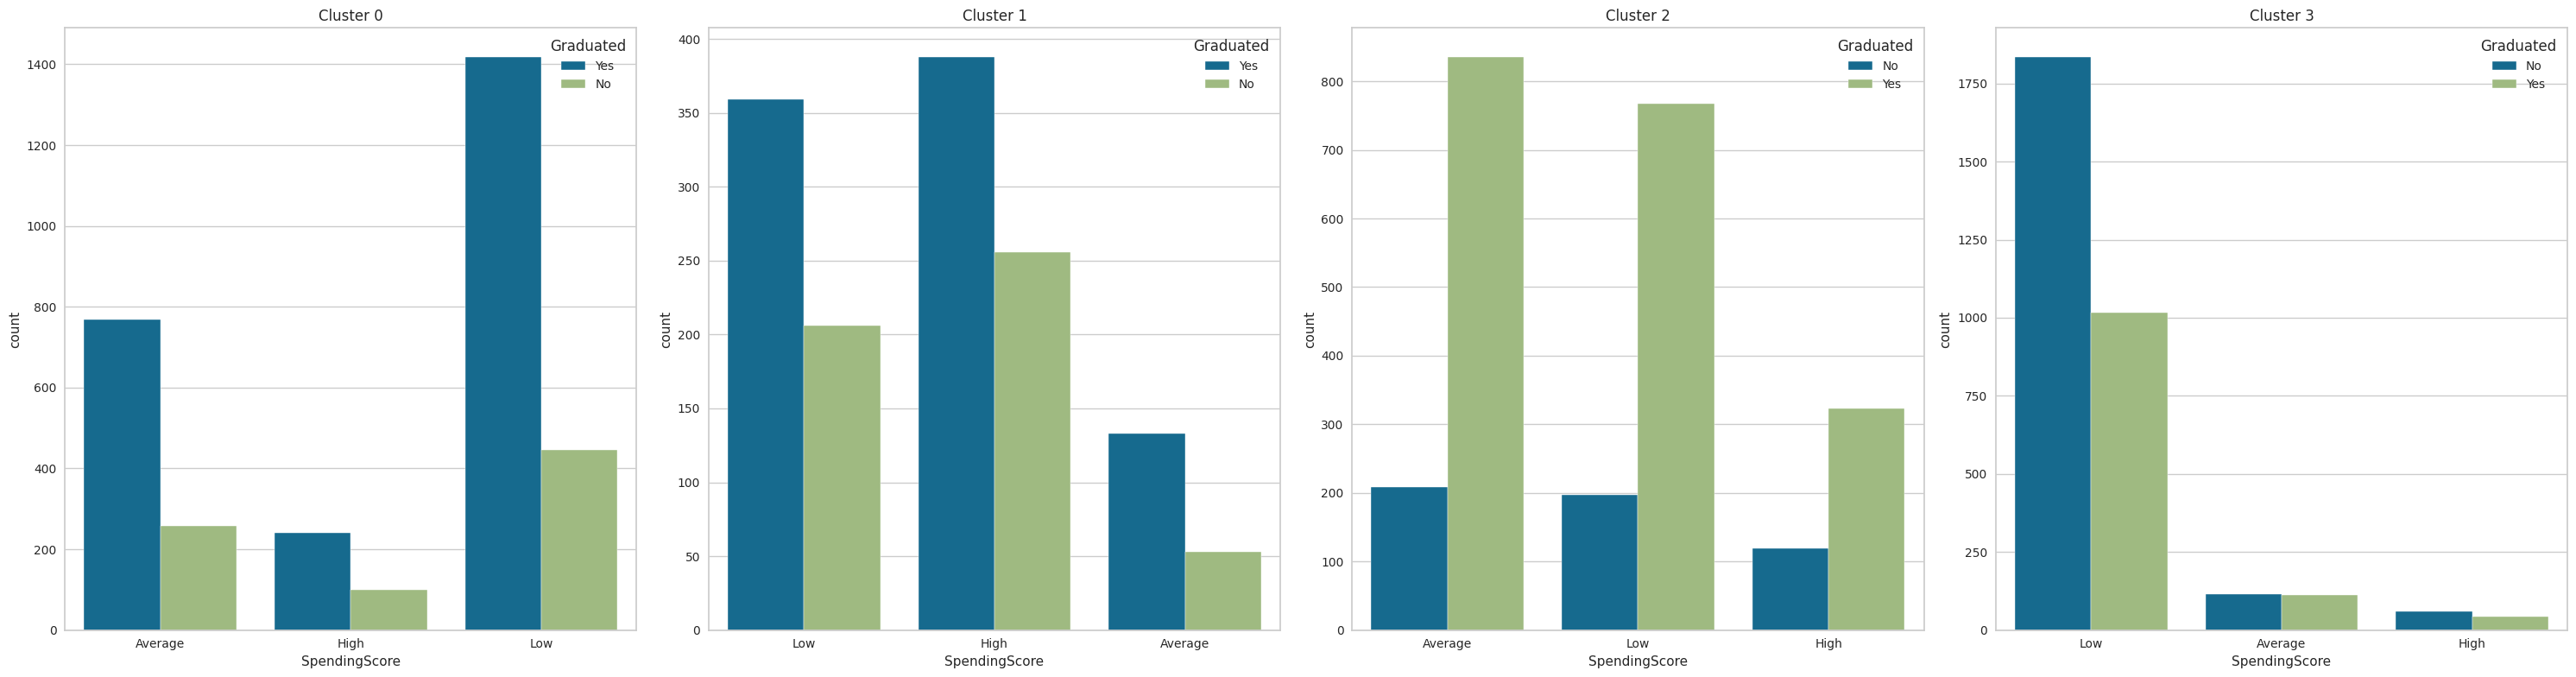

In [50]:
plt.figure(figsize=(30, 8))  # Adjust width and height as needed

# Set the number of clusters
num_clusters = 4

# Create subplots for each cluster
for cluster in range(0, num_clusters):
    plt.subplot(1, num_clusters, cluster+1)
    sns.countplot(data=df2[df2['Cluster'] == cluster], x='SpendingScore', hue='Graduated')
    plt.title(f'Cluster {cluster}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
import scipy.cluster.hierarchy as sch


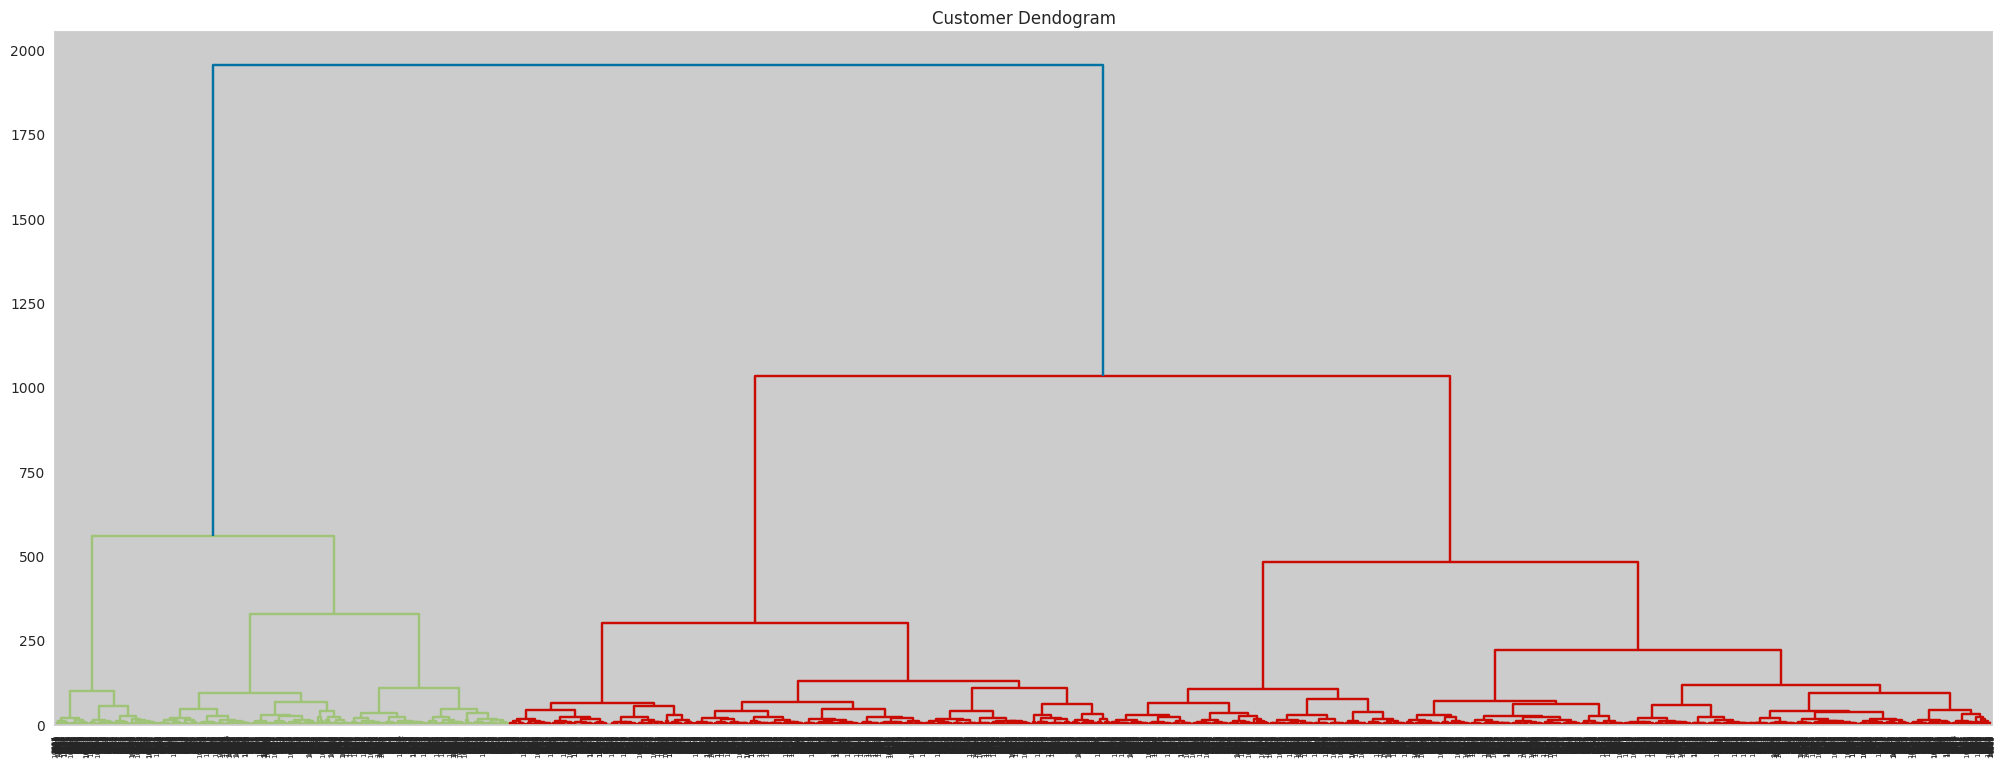

In [52]:
plt.figure(figsize=(25,9))
plt.title('Customer Dendogram')
dend = sch.dendrogram(sch.linkage(KM4_clustered,method='ward'))